<a href="https://colab.research.google.com/github/rjanow/Masterarbeit/blob/main/Masterarbeit_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aktuelle Version der EDA:
Die Struktur ist an die Gliederung des 2ten Materprojektes angepasst.

---



In [1]:
# Verbinden mit der Google-Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import modules

import io, os, sys, setuptools, tokenize
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime
from datetime import timedelta
from math import sqrt

In [3]:
# Größe der Plots festlegen
matplotlib.rcParams['figure.figsize'] = (16, 9)

In [4]:
# Allgemeine Angaben
latitude = 50.2
longitude = 7.8

seconds_in_day = 24*60*60
seconds_in_year = (365.2425)*seconds_in_day

# tz, altitude, name = 'Europe/Berlin', 70, 'SanktAugustin'
# tus = pvlib.location.Location(latitude, longitude, tz, altitude, name)

In [5]:
# Pfad zur CSV-Datei auf Google Drive
name_Messwerte = 'Messdaten_CAMS_GHI.csv'
name_Vorhersage = 'Vorhersagedaten_CAMS_VarIdx.csv'

folder_import = '/content/drive/My Drive/Colab_Notebooks/Clean_Data/'
folder_export = '/content/drive/My Drive/Colab_Notebooks/plot_daily_UVI/'

# Import der Vorhersagewerte:

In [6]:
df_Vorhersage = pd.read_csv(folder_import + name_Vorhersage)
df_Vorhersage.set_index('Datetime', inplace=True)
df_Vorhersage.index = pd.to_datetime(df_Vorhersage.index)

# Import der Messwerte:

In [7]:
df_Messwerte = pd.read_csv(folder_import + name_Messwerte)
df_Messwerte.set_index('Datetime', inplace=True)
df_Messwerte.index = pd.to_datetime(df_Messwerte.index)

In [8]:
df_Messwerte['Observation_period'] = pd.to_datetime(df_Messwerte['Observation_period'])
df_Messwerte['date'] = df_Messwerte['Observation_period'].dt.date

In [9]:
def remove_sza_between_80_and_90(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    result = pd.DataFrame()

    for datum, df_tag in df.groupby('date'):
        # Zeilen entfernen, in denen SZA zwischen 80° und 100° liegt (exklusiv)
        df_filtered = df_tag[~df_tag['SZA'].between(70, 100)]
        result = pd.concat([result, df_filtered], ignore_index=True)

    return result

In [10]:
df_Messwerte = remove_sza_between_80_and_90(df_Messwerte)

In [11]:
hour_bins = [3, 6, 9, 12, 15, 18, 21]  # Beispiel für mögliche Bins
hour_labels = ['03:00-06:00', '06:00-09:00', '09:00-12:00', '12:00-15:00', '15:00-18:00', '18:00-21:00']
df_Messwerte['Time_bins'] = pd.cut(df_Messwerte['Hour'], bins=hour_bins, labels=hour_labels, right=False)

In [12]:
df_Messwerte

,Observation_period,Clear_sky_GHI,Clear_sky_BHI,GHI,BHI,UVI,UVA,UVB,erythem,Datum,...,DiffGreater2,SZA,time_sin,time_cos,date_sin,date_cos,Date,Hour,date,Time_bins
0,2022-06-15 07:20:00,566.244,463.071,566.244,463.071,2.408378,4.686417,281.330695,0.060209,2022-06-15,...,0,55.189579,0.938191,-0.346117,0.282051,-0.959399,2022-06-15,7,2022-06-15,06:00-09:00
1,2022-06-15 07:22:00,571.440,467.799,571.440,467.799,2.408378,4.686417,281.330695,0.060209,2022-06-15,...,0,54.874946,0.938191,-0.346117,0.282051,-0.959399,2022-06-15,7,2022-06-15,06:00-09:00
2,2022-06-15 07:24:00,576.618,472.512,576.618,472.512,2.462381,4.793073,287.094062,0.061560,2022-06-15,...,0,54.560533,0.935135,-0.354291,0.282051,-0.959399,2022-06-15,7,2022-06-15,06:00-09:00
3,2022-06-15 07:26:00,581.772,477.204,581.772,477.204,2.479048,4.817792,288.902613,0.061976,2022-06-15,...,0,54.246355,0.932008,-0.362438,0.282051,-0.959399,2022-06-15,7,2022-06-15,06:00-09:00
4,2022-06-15 07:28:00,586.905,481.881,586.905,481.881,2.543531,4.953151,292.450776,0.063588,2022-06-15,...,0,53.932431,0.928810,-0.370557,0.282051,-0.959399,2022-06-15,7,2022-06-15,06:00-09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51442,2023-08-18 16:22:00,310.191,213.690,310.191,213.690,0.987608,1.749780,158.164124,0.024690,2023-08-18,...,0,68.425969,-0.909961,-0.414693,-0.727757,-0.685835,2023-08-18,16,2023-08-18,15:00-18:00
51443,2023-08-18 16:24:00,304.626,208.965,304.626,208.965,0.960012,1.692237,155.235568,0.024000,2023-08-18,...,0,68.740862,-0.913545,-0.406737,-0.727757,-0.685835,2023-08-18,16,2023-08-18,15:00-18:00
51444,2023-08-18 16:26:00,299.058,204.258,299.058,204.258,0.926792,1.625562,151.820408,0.023170,2023-08-18,...,0,69.055963,-0.917060,-0.398749,-0.727757,-0.685835,2023-08-18,16,2023-08-18,15:00-18:00
51445,2023-08-18 16:28:00,293.490,199.557,293.490,199.557,0.895625,1.558596,148.334074,0.022391,2023-08-18,...,0,69.371256,-0.920505,-0.390731,-0.727757,-0.685835,2023-08-18,16,2023-08-18,15:00-18:00


In [13]:
df_Vorhersage

,aod469,aod550,gtco3,uvbed,uvbedcs,hcc,lcc,tcc,index_sigma,index_coimbra,index_stein,kc
Datetime,,,,,,,,,,,,
2022-06-01 00:00:00,0.261836,0.211588,0.008161,-5.551115e-16,5.551115e-16,0.000000,0.000000,0.504647,NaN,NaN,NaN,NaN
2022-06-01 01:00:00,0.272371,0.220283,0.008044,-5.551115e-16,5.551115e-16,0.000000,0.000000,0.681122,NaN,NaN,NaN,NaN
2022-06-01 02:00:00,0.237297,0.190401,0.007992,-5.551115e-16,5.551115e-16,0.124487,0.015687,0.414249,NaN,NaN,NaN,NaN
2022-06-01 03:00:00,0.195020,0.155880,0.007971,-5.551115e-16,5.551115e-16,0.071994,0.005310,0.076343,NaN,NaN,NaN,NaN
2022-06-01 04:00:00,0.164975,0.131777,0.007959,7.204596e-02,7.198133e-02,0.000000,0.001114,0.001785,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31 19:00:00,0.131174,0.109557,0.006663,5.551115e-16,5.551115e-16,1.000000,0.259121,1.000000,NaN,NaN,NaN,NaN
2023-07-31 20:00:00,0.126791,0.106162,0.006666,5.551115e-16,5.551115e-16,1.000000,0.473365,1.000000,NaN,NaN,NaN,NaN
2023-07-31 21:00:00,0.133466,0.111809,0.006700,5.551115e-16,5.551115e-16,0.999878,0.934537,1.000000,NaN,NaN,NaN,NaN


Allgemeine Informationen über die Vorhersagewerte und Messwerte:

In [14]:
print(df_Vorhersage.describe(),
df_Vorhersage.isna().sum())

             aod469        aod550         gtco3         uvbed       uvbedcs  \
count  10224.000000  10224.000000  10224.000000  1.022400e+04  1.022400e+04   
mean       0.193068      0.158245      0.006973  8.174907e-01  1.083072e+00   
std        0.144147      0.118452      0.000769  1.493487e+00  1.829005e+00   
min        0.021603      0.017586      0.004843 -5.551115e-16 -5.551115e-16   
25%        0.093358      0.076800      0.006484  0.000000e+00  0.000000e+00   
50%        0.149364      0.122642      0.006922  2.699899e-02  4.136721e-02   
75%        0.251221      0.205252      0.007391  9.022764e-01  1.384716e+00   
max        1.345396      1.122722      0.010138  7.965581e+00  7.983141e+00   

                hcc           lcc           tcc  index_sigma  index_coimbra  \
count  10224.000000  10224.000000  10224.000000  1496.000000    1496.000000   
mean       0.421584      0.375480      0.678987     0.025037       0.129958   
std        0.432544      0.412021      0.386534    

In [15]:
df_Messwerte.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,Observation_period,Clear_sky_GHI,Clear_sky_BHI,GHI,BHI,UVI,UVA,UVB,erythem,Messzeitpunkt,...,Glo_SPLite,Dir,Temp,DiffGreater2,SZA,time_sin,time_cos,date_sin,date_cos,Hour
count,51447,51447.000000,51447.000000,51447.000000,51447.000000,51447.000000,51447.000000,51447.000000,51447.000000,51447.000000,...,51447.000000,51447.000000,51447.000000,51447.0,51447.000000,51447.000000,51447.000000,51447.000000,51447.000000,51447.000000
mean,2022-12-07 03:46:39.909032704,587.565219,454.202389,402.702119,207.421173,2.335782,4.531351,224.118700,0.058395,41557.538049,...,408.587346,349.265547,20.882699,0.0,51.961178,0.091629,-0.757836,-0.188631,-0.468412,11.067740
min,2022-06-15 07:20:00,210.846000,66.579000,1.990200,0.000000,0.022129,0.025665,5.253612,0.000553,20700.000000,...,5.050000,0.000000,-0.550000,0.0,27.364001,-0.984041,-1.000000,-0.999999,-0.999979,5.000000
10%,2022-06-30 06:29:12,352.676400,250.278600,106.413000,0.001200,0.561780,1.021442,74.310127,0.014044,27900.000000,...,110.626667,2.075000,11.383333,0.0,34.092540,-0.771625,-0.994522,-0.975357,-0.989630,7.000000
25%,2022-08-03 14:47:00,425.131500,316.255500,225.736500,0.875100,0.954831,1.775183,125.460308,0.023871,33900.000000,...,196.141667,3.183333,16.233333,0.0,40.987477,-0.414693,-0.965926,-0.739447,-0.920210,9.000000
50%,2022-10-07 13:08:00,580.758000,448.503000,378.147000,129.726000,1.765895,3.439786,198.811488,0.044147,41520.000000,...,372.191667,176.266667,20.808333,0.0,53.581093,0.121869,-0.850352,-0.375537,-0.710463,11.000000
75%,2023-04-25 09:29:00,752.335500,583.732500,574.980000,365.938500,3.374844,6.649579,312.699683,0.084371,49080.000000,...,597.245833,746.979167,25.933333,0.0,63.141618,0.625923,-0.608761,0.493477,-0.067588,13.000000
90%,2023-08-01 11:02:48,831.839400,678.874800,747.189000,570.697800,5.146883,10.043221,419.392378,0.128672,55320.000000,...,777.468333,868.203333,30.466667,0.0,67.488165,0.896873,-0.366501,0.905035,0.421785,15.000000
max,2023-08-18 16:30:00,931.527000,812.622000,931.527000,812.622000,8.542809,16.142099,647.706510,0.213570,62340.000000,...,1189.925000,1016.758333,47.766667,0.0,69.999553,1.000000,0.065403,0.999578,0.908937,17.000000
std,NaN,179.246128,161.186679,231.928364,226.301529,1.761512,3.446226,126.657744,0.044038,9906.610770,...,245.897975,363.602169,7.113965,0.0,12.344316,0.596235,0.248596,0.669460,0.544836,2.766689


In [16]:
# Interquartile Range berechnen

Q1_UVI = df_Messwerte['UVI'].quantile(0.25)
Q2_UVI = df_Messwerte['UVI'].quantile(0.5)
Q3_UVI = df_Messwerte['UVI'].quantile(0.75)

IQR_UVI = Q3_UVI - Q1_UVI

print(f"25. Perzentil: {round(Q1_UVI, 3)}, 5. Perzentil: {round(Q2_UVI, 3)}, 75. Perzentil: {round(Q3_UVI, 3)}, IQR: {round(IQR_UVI, 3)}")


25. Perzentil: 0.955, 5. Perzentil: 1.766, 75. Perzentil: 3.375, IQR: 2.42


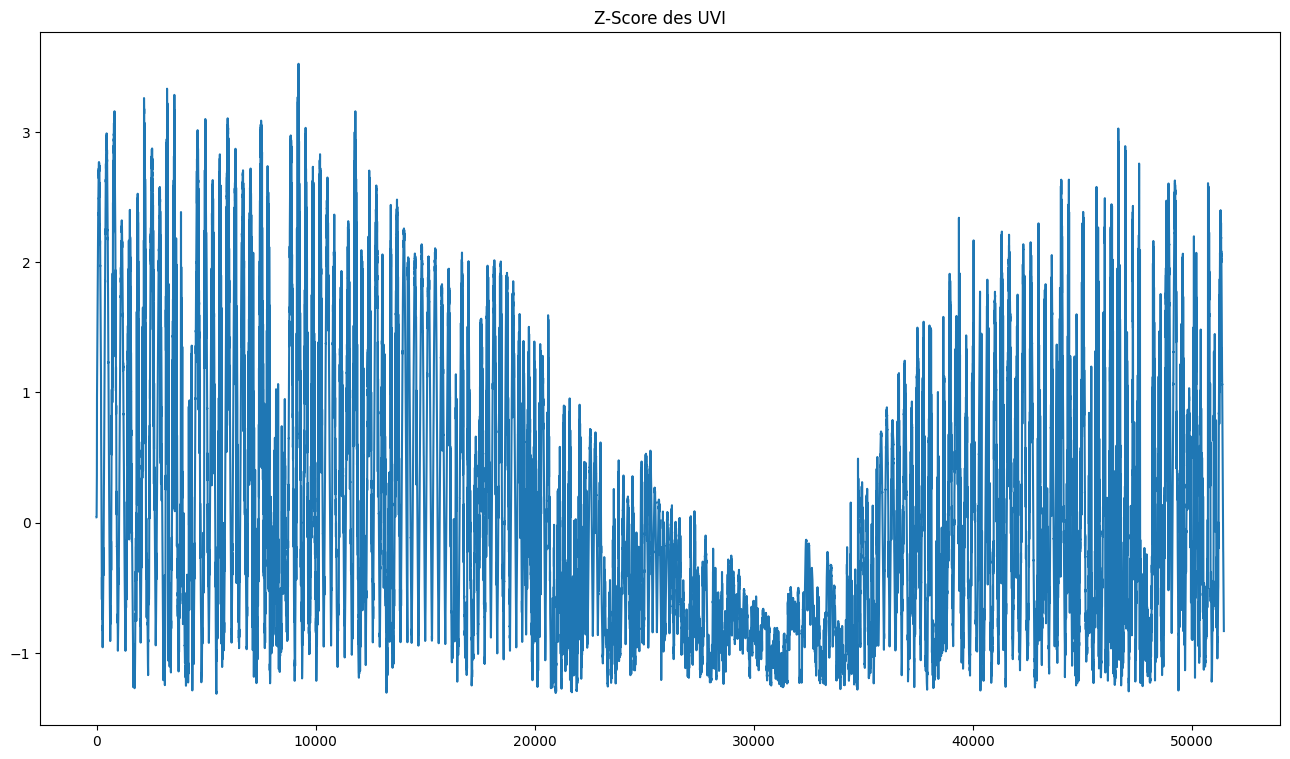

In [17]:
# Z-score über alle Messdaten berechnen
df_ZScore = pd.DataFrame()

mittelwert = df_Messwerte['UVI'].mean()
standardabweichung = df_Messwerte['UVI'].std()

df_ZScore['Z-Score'] = (df_Messwerte['UVI'] - mittelwert) / standardabweichung
plt.plot(df_ZScore)
plt.title('Z-Score des UVI')
plt.savefig('/content/drive/My Drive/Colab_Notebooks/plot_TSA/Z_Score_UVI.png')

# Qunatilspezifische Analyse des UVI:

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datum in datetime, falls nicht bereits erfolgt
df_Messwerte['Datum'] = pd.to_datetime(df_Messwerte['Datum'])

# Monat extrahieren
df_Messwerte['Monat'] = df_Messwerte['Datum'].dt.month

# Uhrzeit binär in Kategorien gruppiert (falls noch nicht vorhanden)
# z. B. 06:00–09:00 etc. scheint schon in 'Time_bins' zu sein

In [19]:
df_Messwerte, df_Vorhersage

(       Observation_period  Clear_sky_GHI  Clear_sky_BHI      GHI      BHI  \
 0     2022-06-15 07:20:00        566.244        463.071  566.244  463.071   
 1     2022-06-15 07:22:00        571.440        467.799  571.440  467.799   
 2     2022-06-15 07:24:00        576.618        472.512  576.618  472.512   
 3     2022-06-15 07:26:00        581.772        477.204  581.772  477.204   
 4     2022-06-15 07:28:00        586.905        481.881  586.905  481.881   
 ...                   ...            ...            ...      ...      ...   
 51442 2023-08-18 16:22:00        310.191        213.690  310.191  213.690   
 51443 2023-08-18 16:24:00        304.626        208.965  304.626  208.965   
 51444 2023-08-18 16:26:00        299.058        204.258  299.058  204.258   
 51445 2023-08-18 16:28:00        293.490        199.557  293.490  199.557   
 51446 2023-08-18 16:30:00        287.916        194.868  287.916  194.868   
 
             UVI       UVA         UVB   erythem      Datum  .

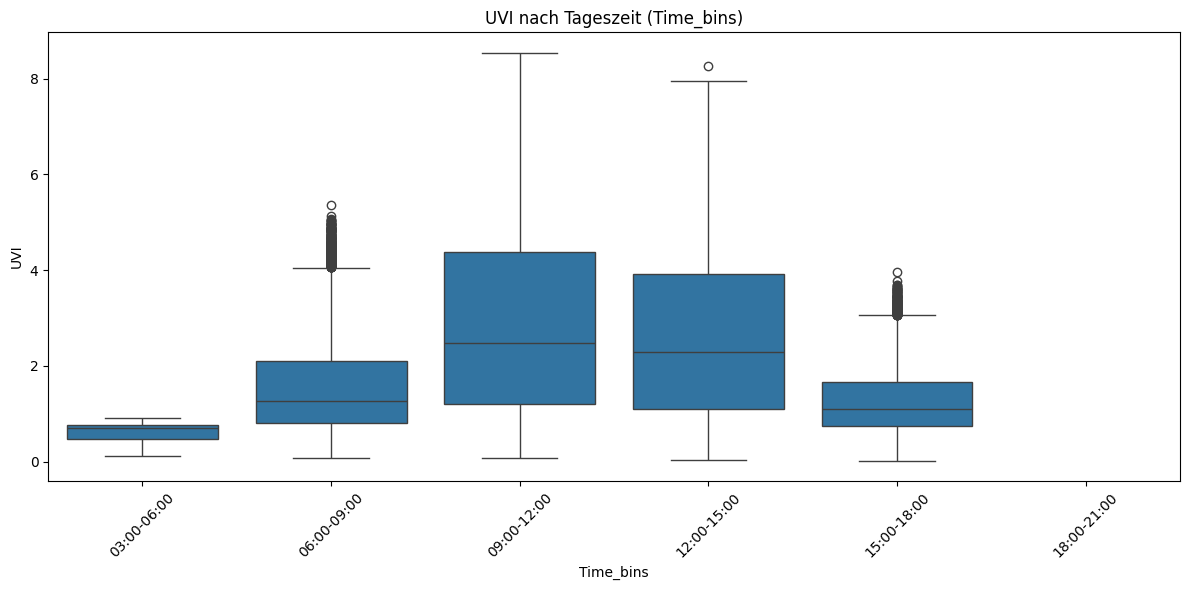

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_Messwerte, x='Time_bins', y='UVI')
plt.title('UVI nach Tageszeit (Time_bins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

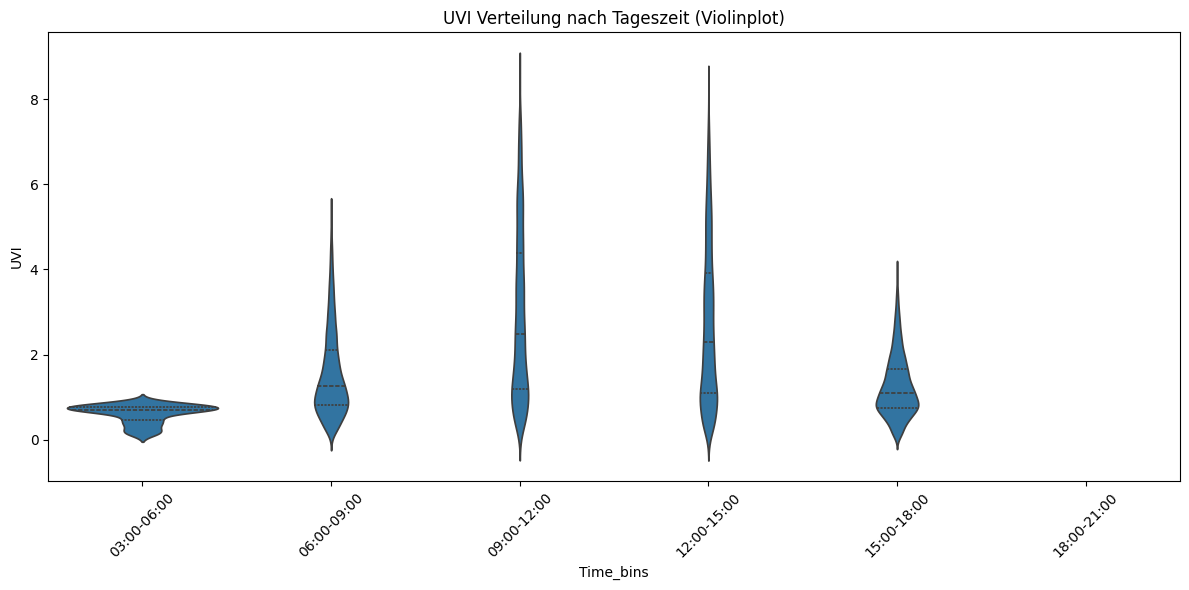

In [21]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_Messwerte, x='Time_bins', y='UVI', inner='quartile')
plt.title('UVI Verteilung nach Tageszeit (Violinplot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

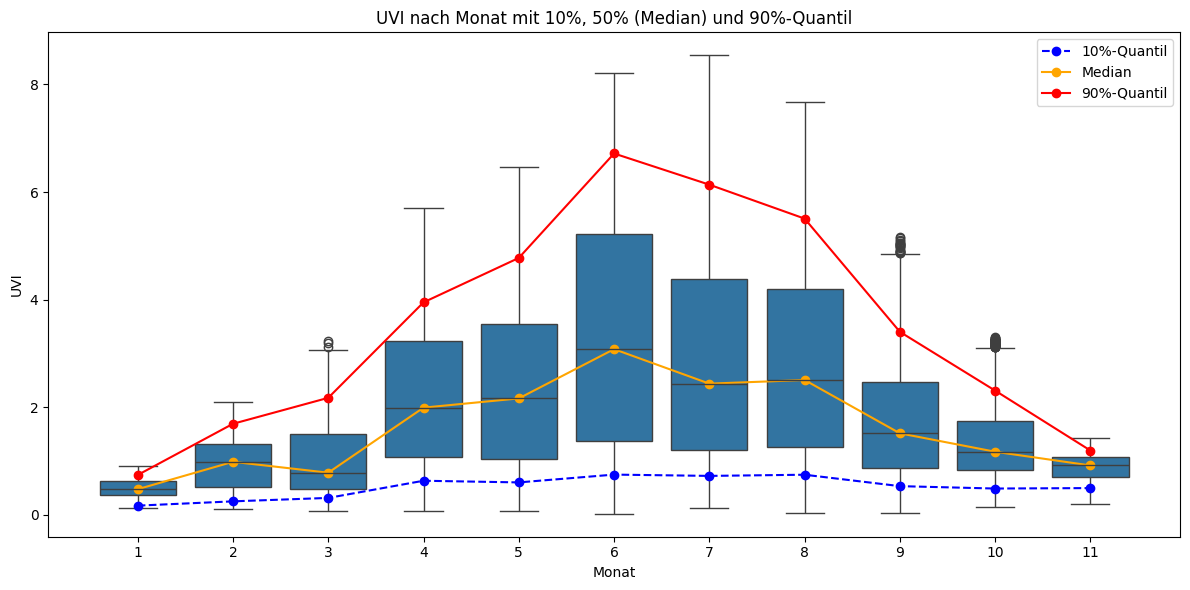

In [22]:
# Stelle sicher, dass 'Monat' numerisch ist
df_Messwerte['Monat'] = df_Messwerte['Monat'].astype(int)

# Berechnung der Quantile und Median pro Monat
uvi_quantiles = df_Messwerte.groupby('Monat')['UVI'].quantile([0.1, 0.5, 0.9]).unstack()

plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=df_Messwerte, x='Monat', y='UVI')

# Liniendiagramme für Quantile
plt.plot(uvi_quantiles.index - 1, uvi_quantiles[0.1], label='10%-Quantil', color='blue', linestyle='dashed', marker='o')
plt.plot(uvi_quantiles.index - 1, uvi_quantiles[0.5], label='Median', color='orange', linestyle='solid', marker='o')
plt.plot(uvi_quantiles.index - 1, uvi_quantiles[0.9], label='90%-Quantil', color='red', linestyle='solid', marker='o')

# Plot-Details
plt.title('UVI nach Monat mit 10%, 50% (Median) und 90%-Quantil')
plt.xlabel('Monat')
plt.ylabel('UVI')
plt.legend()
plt.tight_layout()
plt.show()

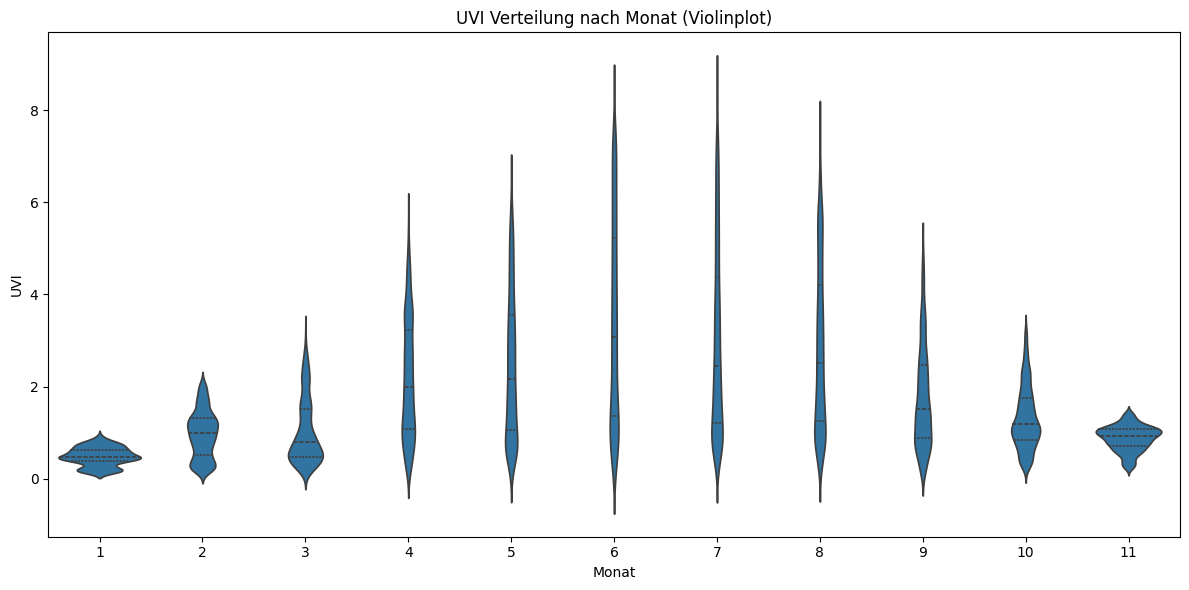

In [23]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_Messwerte, x='Monat', y='UVI', inner='quartile')
plt.title('UVI Verteilung nach Monat (Violinplot)')
plt.tight_layout()
plt.show()

In [24]:
df_Messwerte['Cloud_Index'] = df_Messwerte['ghi'] / df_Messwerte['Clear_sky_GHI']
# z. B. in Klassen einteilen
df_Messwerte['Bewölkung'] = pd.cut(df_Messwerte['Cloud_Index'],
                                   bins=[0, 0.2, 0.5, 0.8, 1.0, 1.5],
                                   labels=['sehr bewölkt', 'bewölkt', 'teilweise', 'klar', 'überklar'])

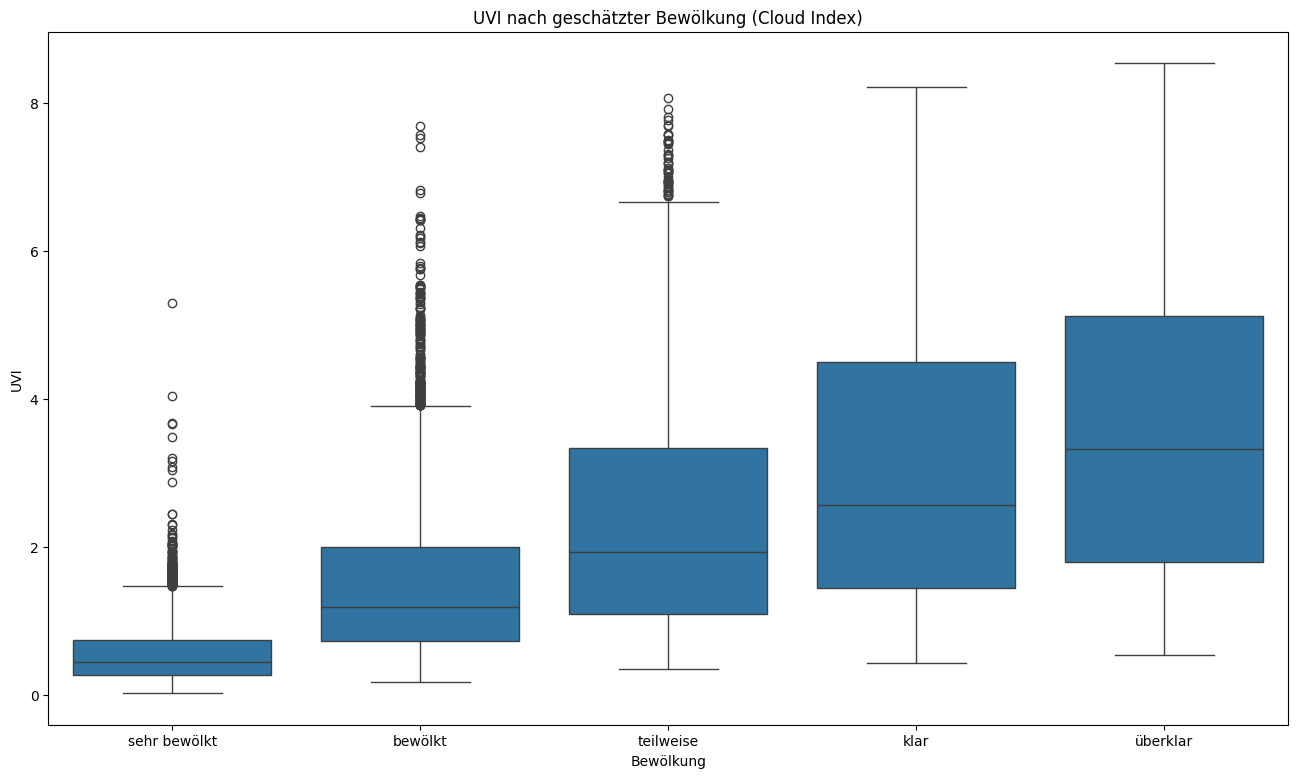

In [25]:
sns.boxplot(data=df_Messwerte, x='Bewölkung', y='UVI')
plt.title('UVI nach geschätzter Bewölkung (Cloud Index)')
plt.show()

In [26]:
quantiles = df_Messwerte.groupby('Time_bins')['UVI'].quantile([0.1, 0.5, 0.9]).unstack()
quantiles.columns = ['10%', '50%', '90%']
print(quantiles)

                  10%       50%       90%
Time_bins                                
03:00-06:00  0.208860  0.702600  0.827686
06:00-09:00  0.505437  1.263432  3.067027
09:00-12:00  0.679156  2.471331  5.844915
12:00-15:00  0.587937  2.292057  5.410232
15:00-18:00  0.466261  1.098673  2.284422
18:00-21:00       NaN       NaN       NaN


/tmp/ipython-input-2646698900.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles = df_Messwerte.groupby('Time_bins')['UVI'].quantile([0.1, 0.5, 0.9]).unstack()


/tmp/ipython-input-488354368.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_90 = df_Messwerte.pivot_table(
/tmp/ipython-input-488354368.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_50 = df_Messwerte.pivot_table(


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

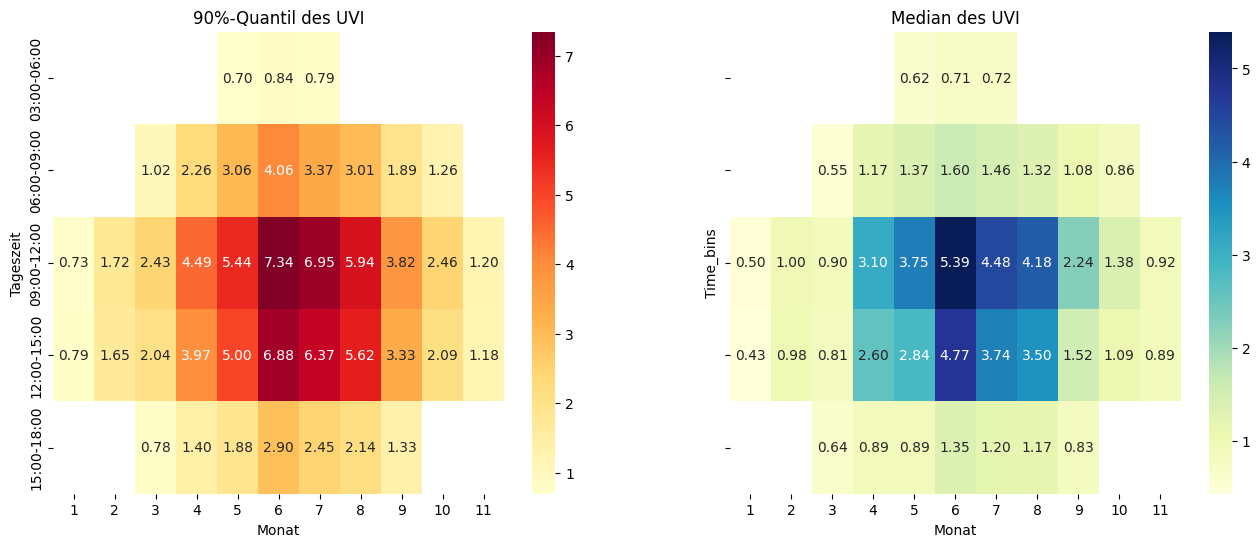

In [27]:
# Heatmap 1: 90%-Quantil
pivot_90 = df_Messwerte.pivot_table(
    index='Time_bins',
    columns='Monat',
    values='UVI',
    aggfunc=lambda x: x.quantile(0.9)
)

# Heatmap 2: Median (50%-Quantil)
pivot_50 = df_Messwerte.pivot_table(
    index='Time_bins',
    columns='Monat',
    values='UVI',
    aggfunc='median'  # oder: lambda x: x.quantile(0.5)
)

# Plot: zwei Heatmaps nebeneinander
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Heatmap für 90%-Quantil
sns.heatmap(pivot_90, annot=True, fmt=".2f", cmap="YlOrRd", ax=axes[0])
axes[0].set_title("90%-Quantil des UVI")
axes[0].set_ylabel("Tageszeit")
axes[0].set_xlabel("Monat")

# Heatmap für Median
sns.heatmap(pivot_50, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Median des UVI")
axes[1.].set_ylabel("Tageszeit")
axes[1].set_xlabel("Monat")

plt.tight_layout()
plt.show()